In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import tensorflow as tf
print(tf.__version__)

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

import src.functions as fn

plt.style.use('fivethirtyeight')

2.2.0


## Purpose of this notebook:
Build a very simple model to measure performance increase.


### Data import
Data is imported as grayscale in 100 by 100 dimensions.

In [2]:
train_data, val_data, test_data = fn.load_data_generators()

Found 2568 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Model Parameters:
- Layers:
 - Flatten layer
 - Dense layer with 85 nodes and ReLU activation
 - Output layer
- Optimizer: Adam
- Loss: binary crossentropy

In [3]:
model = Sequential()
model.add(Flatten(input_shape=(100,100,1)))
model.add(Dense(units=85, 
                activation='relu'))
model.add(Dense(units=1, 
                activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

### Fit model
- Trained for 10 epochs
- Number of steps is set equal to the length of the data generator which means it will run through the entire data folder at each epoch.

In [4]:
history = model.fit(train_data, 
                    epochs=10, 
                    validation_data=(val_data), 
                    steps_per_epoch=len(train_data), 
                    validation_steps=len(val_data))

Epoch 1/10
81/81 [==============================] - 54s 662ms/step - loss: 0.9850 - accuracy: 0.6351 - precision: 0.6430 - recall: 0.7813 - val_loss: 0.5532 - val_accuracy: 0.7873 - val_precision: 0.7922 - val_recall: 0.8918
Epoch 2/10
81/81 [==============================] - 51s 625ms/step - loss: 0.5194 - accuracy: 0.7640 - precision: 0.7470 - recall: 0.8740 - val_loss: 0.4885 - val_accuracy: 0.8091 - val_precision: 0.8937 - val_recall: 0.7865
Epoch 3/10
81/81 [==============================] - 48s 596ms/step - loss: 0.4450 - accuracy: 0.8053 - precision: 0.7951 - recall: 0.8781 - val_loss: 0.4188 - val_accuracy: 0.8364 - val_precision: 0.8795 - val_recall: 0.8538
Epoch 4/10
81/81 [==============================] - 45s 552ms/step - loss: 0.4062 - accuracy: 0.8220 - precision: 0.8266 - recall: 0.8628 - val_loss: 0.3583 - val_accuracy: 0.8527 - val_precision: 0.8896 - val_recall: 0.8713
Epoch 5/10
81/81 [==============================] - 44s 548ms/step - loss: 0.3967 - accuracy: 0.8252

## Evaluation on holdout

In [5]:
acc = model.evaluate(test_data, steps=len(test_data), verbose=1)
list(zip(model.metrics_names, acc))

20/20 [==============================] - 5s 266ms/step - loss: 0.3890 - accuracy: 0.8157 - precision: 0.8022 - recall: 0.9359


[('loss', 0.3890226185321808),
 ('accuracy', 0.8157051205635071),
 ('precision', 0.8021978139877319),
 ('recall', 0.9358974099159241)]

### Create test set array
This makes it easier to create a confusion matrix.
Run both lines to get the full test data.

In [6]:
data_array, class_list = fn.generator_to_array(test_data)

In [7]:
y_hat = model.predict_classes(data_array)
y_true = class_list

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

      NORMAL       0.85      0.62      0.71       234
   PNEUMONIA       0.80      0.94      0.86       390

    accuracy                           0.82       624
   macro avg       0.83      0.78      0.79       624
weighted avg       0.82      0.82      0.81       624

Accurancy:  0.8157051282051282


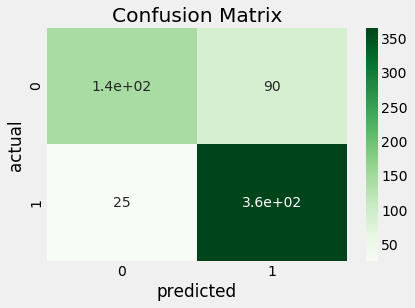

In [8]:
fn.evaluation(y_true, y_hat)

In [9]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

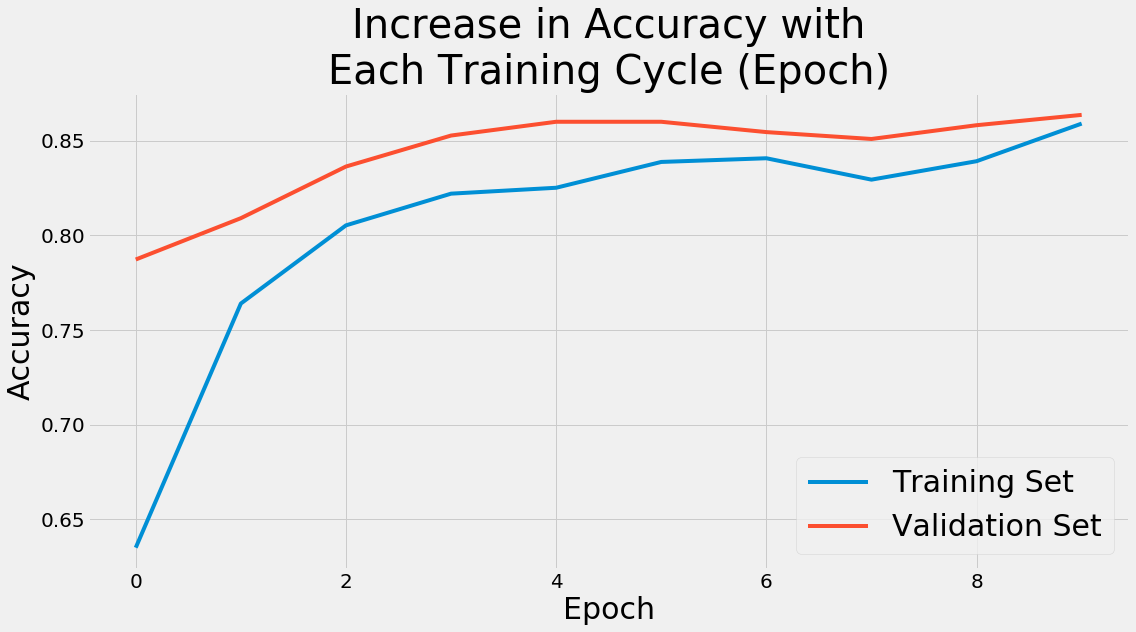

In [10]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax, label='Training Set')
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

# plt.savefig('accuracy_with_val.png', transparency=True) # uncomment to save image

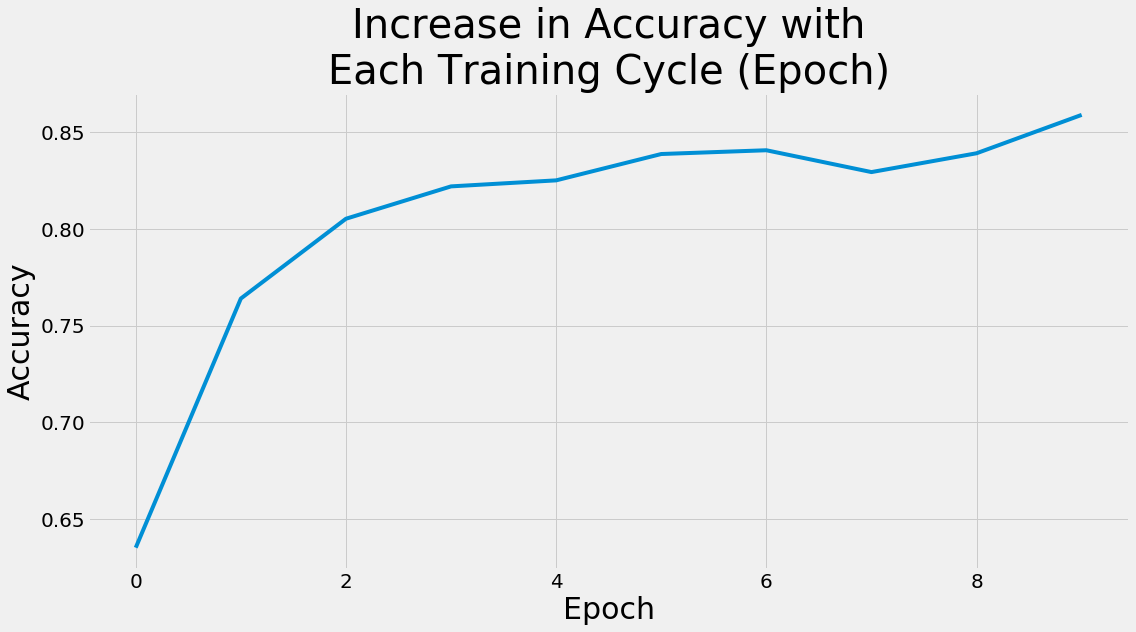

In [11]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

# plt.savefig('accuracy.png', transparency=True) # uncomment to save image

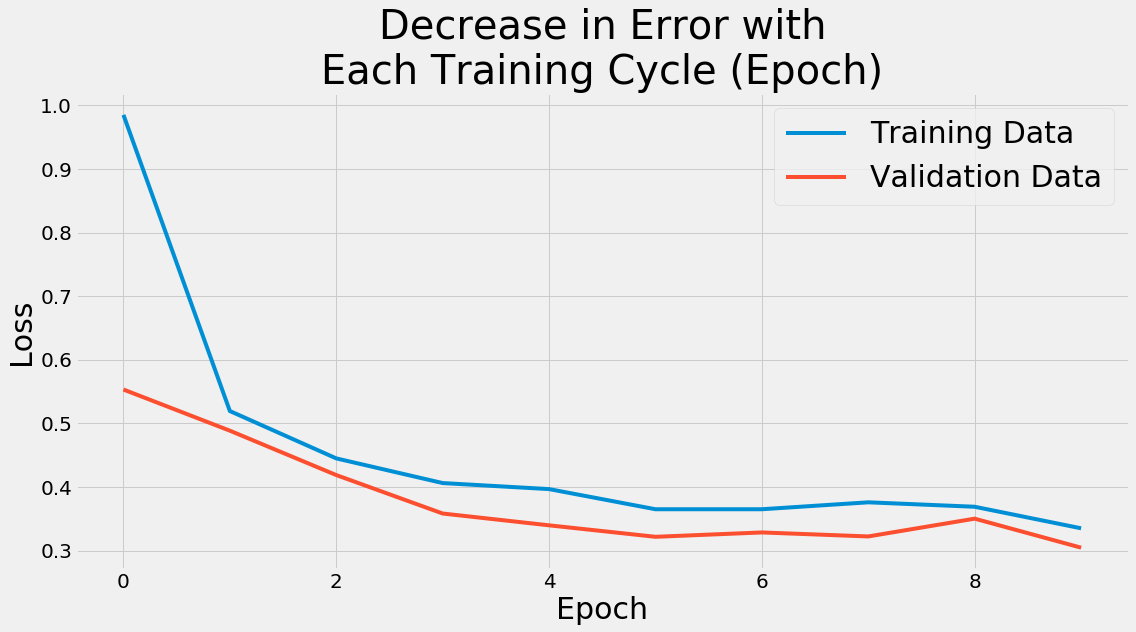

In [12]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax, label='Training Data')

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

# plt.savefig('loss_with_val.png', transparency=True) # uncomment to save image

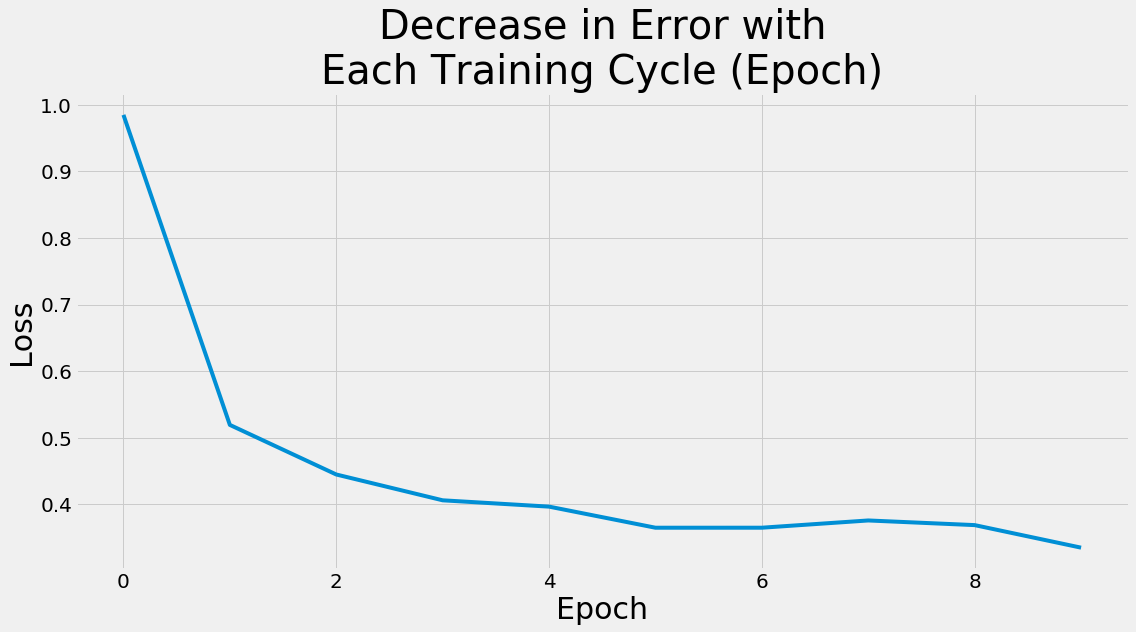

In [13]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax)

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

# plt.savefig('loss.png', transparency=True) # uncomment to save image